# Data Modeling 

In [6]:
import pandas as pd
import numpy as np
import sklearn as sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [22]:
df = pd.read_csv('../archive/final_data.csv')
df_w_genres = pd.read_csv('../archive/data_w_genres.csv')
dfa = pd.read_csv('../archive/data_by_artist.csv')
dfy = pd.read_csv('../archive/data_by_year.csv')
dfg = pd.read_csv('../archive/data_by_genres.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        169909 non-null  int64  
 1   acousticness      169909 non-null  float64
 2   artists           169909 non-null  object 
 3   danceability      169909 non-null  float64
 4   duration_ms       169909 non-null  int64  
 5   energy            169909 non-null  float64
 6   explicit          169909 non-null  int64  
 7   id                169909 non-null  object 
 8   instrumentalness  169909 non-null  float64
 9   key               169909 non-null  int64  
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  mode              169909 non-null  int64  
 13  name              169909 non-null  object 
 14  popularity        169909 non-null  int64  
 15  release_date      169909 non-null  object 
 16  speechiness       16

,Unnamed: 0,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,...,name,popularity,release_date,speechiness,tempo,valence,year,loudness_norm,temp_norm,year_bins
0,0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,...,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928,-0.186652,0.049500,0
1,1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,...,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928,-3.014729,-1.073199,0
2,2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,...,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928,-1.509457,-0.317996,0
3,3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,...,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928,-0.593587,-0.291114,0
4,4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,...,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928,-0.963288,-1.783425,0


## Clustering 
We are clustering on all numeric features except popularity and year.

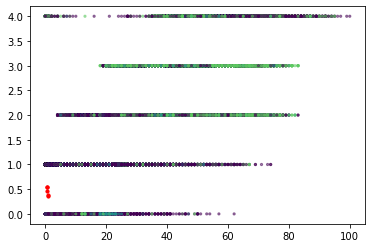

In [28]:
# K-means 
features = ['acousticness', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
        'liveness', 'loudness','mode','speechiness','tempo','valence']
df_kmeans = df[features]
n_samples = df_kmeans.shape[0]
n_features = len(features)

labels = df['year_bins']

kmeans = KMeans(n_clusters=5).fit(df_kmeans)
centroids = kmeans.cluster_centers_
# print(centroids)

# TODO: plot by 
plt.scatter(df['popularity'], df['year_bins'], c= kmeans.labels_.astype(float), s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

In [ ]:
#t-SNE
